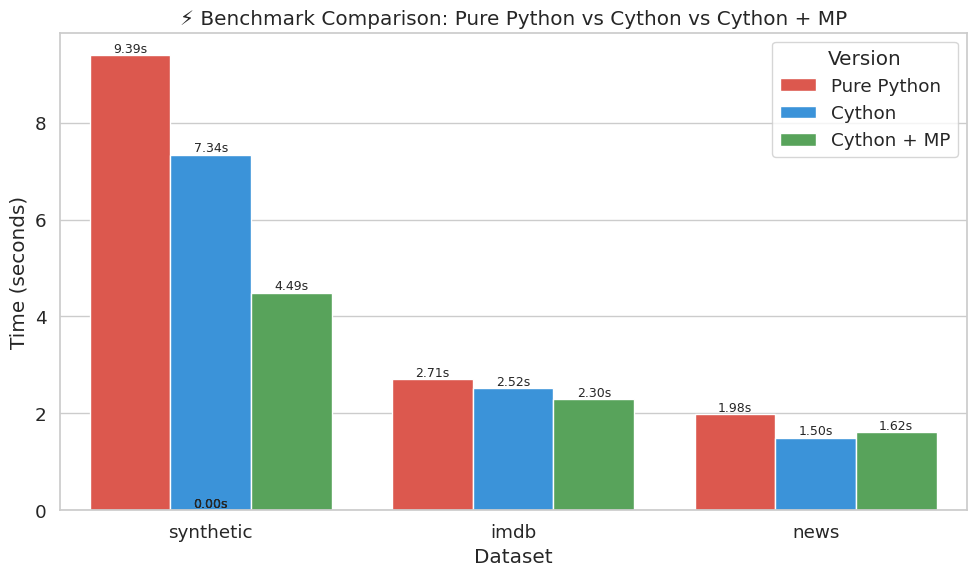

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load benchmark results
df = pd.read_csv("../results/benchmark_results.csv")

# Capitalize version labels for prettier plot
df["version"] = df["version"].str.upper().replace({
    "PYTHON": "Pure Python",
    "CYTHON": "Cython",
    "CYTHON+MP": "Cython + MP"
})

# Set Seaborn style
sns.set(style="whitegrid", font_scale=1.2)
palette = {
    "Pure Python": "#f44336",       # Red
    "Cython": "#2196f3",            # Blue
    "Cython + MP": "#4caf50"        # Green
}

# Plot setup
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=df,
    x="dataset",
    y="time",
    hue="version",
    palette=palette
)

# Add bar labels
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.2f}s', 
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom', fontsize=9)

# Title and labels
plt.title("⚡ Benchmark Comparison: Pure Python vs Cython vs Cython + MP")
plt.ylabel("Time (seconds)")
plt.xlabel("Dataset")
plt.legend(title="Version")
plt.tight_layout()

# Save and show
plt.savefig("../results/benchmark_plot.png")
plt.show()
